# **Notebook 2: Improved Neural Network with Larger Dataset**

## **🎯 Objective**
>Build an improved 2-layer neural network with more capacity, train on a larger dataset, and achieve better performance compared to Homework 1.

---

## **📋 Task Overview**

### **What We're Building:**
- **2-layer Neural Network** (3 → 5 → 1)
- **Binary Classification** task
- **Larger Dataset** (1500 samples vs 1000)
- **More Parameters** (26 vs 17)
- **Better Loss Tracking**

### **Improvements from Notebook 1:**
- More input features (3 vs 2)
- Bigger hidden layer (5 vs 4 neurons)
- More training data (1200 vs 800 samples)
- Larger validation set (300 vs 200 samples)

---

## **🧩 Part 1: Setup and Imports**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

---

## **🏗️ Part 2: Define Neural Network Architecture**

### **Model Structure:**
- **Input Layer:** 3 features (x₁, x₂, x₃)
- **Hidden Layer:** 5 neurons + ReLU activation
- **Output Layer:** 1 neuron + Sigmoid activation
- **Total Parameters:** 26

### **Architecture Comparison:**

| Model | Input | Hidden | Output | Parameters |
|-------|-------|--------|--------|------------|
| NB1   | 2     | 4      | 1      | 17         |
| NB2   | 3     | 5      | 1      | 26         |

### Why Bigger Network?
- **More input features:** Richer data representation
- **5 Hidden Neurons:** More learning capacity
- **26 Parameters:** Better pattern recognition ability

In [2]:
model = nn.Sequential(
    nn.Linear(3, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
    nn.Sigmoid()
)

#### **Architecture Visualization:**
```bash
Input (3) → [Linear] → Hidden (5) → [ReLU] → [Linear] → Output (1) → [Sigmoid] → Prediction
```

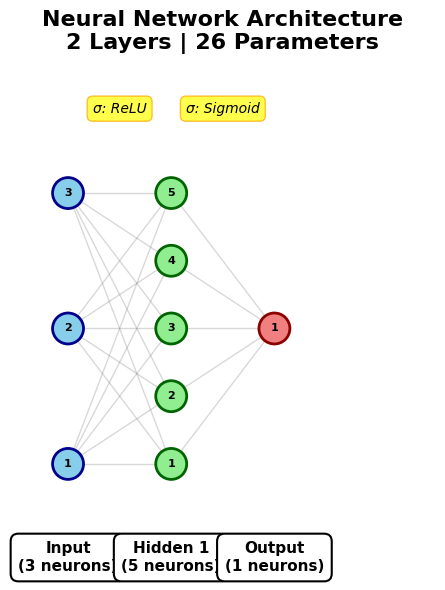

In [3]:
def visualize_model(model):
    """
    Visualize any PyTorch Sequential neural network with proper spacing.
    Automatically extracts layer sizes and activations from the model.
    
    Parameters:
    -----------
    model : nn.Sequential
        Your PyTorch model
    """
    
    # Extract layer information
    layer_sizes = []
    activations = []
    
    for layer in model:
        if isinstance(layer, nn.Linear):
            if len(layer_sizes) == 0:
                layer_sizes.append(layer.in_features)
            layer_sizes.append(layer.out_features)
        elif isinstance(layer, (nn.ReLU, nn.Sigmoid, nn.Tanh, nn.LeakyReLU, nn.ELU)):
            activations.append(layer.__class__.__name__)
    
    if len(layer_sizes) == 0:
        print("No Linear layers found in model!")
        return
    
    # Calculate figure size based on network complexity
    n_layers = len(layer_sizes)
    max_neurons = max(layer_sizes)
    
    fig_width = max(10, n_layers * 3)
    fig_height = max(6, max_neurons * 0.8)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    
    # Calculate proper spacing
    h_spacing = 0.8 / n_layers  # Horizontal spacing between layers
    h_offset = 0.1  # Left margin
    
    positions = []
    
    # Draw each layer
    for layer_idx, n_neurons in enumerate(layer_sizes):
        layer_positions = []
        x = h_offset + layer_idx * h_spacing
        
        # Calculate vertical spacing for this layer
        if n_neurons == 1:
            y_positions = [0.5]
        else:
            v_margin = 0.15
            v_space = (1 - 2 * v_margin) / (n_neurons - 1) if n_neurons > 1 else 0
            y_positions = [v_margin + i * v_space for i in range(n_neurons)]
        
        for neuron_idx, y in enumerate(y_positions):
            layer_positions.append((x, y))
            
            # Determine color
            if layer_idx == 0:
                color = 'skyblue'
                edge_color = 'darkblue'
            elif layer_idx == n_layers - 1:
                color = 'lightcoral'
                edge_color = 'darkred'
            else:
                color = 'lightgreen'
                edge_color = 'darkgreen'
            
            # Calculate circle size based on max neurons
            circle_size = min(0.04, 0.3 / max_neurons)
            
            # Draw neuron
            circle = plt.Circle((x, y), circle_size, 
                              color=color, ec=edge_color, 
                              linewidth=2, zorder=4)
            ax.add_patch(circle)
            
            # Add neuron number for small networks
            if max_neurons <= 10:
                ax.text(x, y, str(neuron_idx + 1), 
                       ha='center', va='center',
                       fontsize=8, fontweight='bold', zorder=5)
        
        positions.append(layer_positions)
    
    # Draw connections between layers
    for layer_idx in range(len(positions) - 1):
        current_layer = positions[layer_idx]
        next_layer = positions[layer_idx + 1]
        
        # Adjust line thickness based on number of connections
        n_connections = len(current_layer) * len(next_layer)
        line_width = max(0.2, min(1.0, 20 / n_connections))
        
        for x1, y1 in current_layer:
            for x2, y2 in next_layer:
                ax.plot([x1, x2], [y1, y2], 
                       'gray', linewidth=line_width, 
                       alpha=0.3, zorder=1)
    
    # Add layer labels at the bottom
    layer_names = ['Input'] + [f'Hidden {i}' for i in range(1, n_layers - 1)] + ['Output']
    
    for layer_idx, (name, size) in enumerate(zip(layer_names, layer_sizes)):
        x = h_offset + layer_idx * h_spacing
        ax.text(x, -0.05, f'{name}\n({size} neurons)', 
               ha='center', va='top',
               fontsize=11, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', 
                        facecolor='white', 
                        edgecolor='black',
                        linewidth=1.5))
    
    # Add activation function labels between layers
    for idx, activation in enumerate(activations):
        x = h_offset + (idx + 0.5) * h_spacing
        ax.text(x, 1.05, f'σ: {activation}', 
               ha='center', va='bottom',
               fontsize=10, style='italic',
               bbox=dict(boxstyle='round,pad=0.4', 
                        facecolor='yellow', 
                        alpha=0.7,
                        edgecolor='orange'))
    
    # Set limits and clean up
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.15, 1.15)
    ax.axis('off')
    ax.set_aspect('equal')
    
    # Add title with model summary
    n_params = sum(p.numel() for p in model.parameters())
    n_linear_layers = len(layer_sizes) - 1  # Don't count input as a layer
    
    plt.title(f'Neural Network Architecture\n{n_linear_layers} Layers | {n_params:,} Parameters', 
              fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

visualize_model(model)
plt.show()

---

## **⚙️ Part 3: Configure Optimizer and Loss Function**

### **Optimizer: Adam**
- **Learning Rate:** 0.001 (same as NB1)
- **Why Adam?** Proven effective in previous homework

### **Loss Function: Mean Squared Error (MSE)**
- **Purpose:** Measures average squared difference between predictions and true labels
- **Change from HW1:** Previously used BCE, now experimenting with MSE
- **Why MSE?** Testing if regression-style loss works for binary classification

### **MSE vs BCE Comparison:**

| Aspect | BCE (NB1) | MSE (NB2) |
|--------|-----------|-----------|
| Formula | `-[y·log(ŷ) + (1-y)·log(1-ŷ)]` | `(y - ŷ)²` |
| Designed for | Classification | Regression |
| Output range | Probability [0,1] | Any value |
| Gradient | Steep for confident errors | Linear |

In [4]:
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

## **📊 Part 4: Generate Synthetic Data**

### **Enhanced Data Generation:**

#### **Step 1: More Random Features**
```
X = random 3D points (instead of 2D)
```

#### **Step 2: Same Non-Linear Pattern**
```
y = 1 if sin(x₁) + cos(x₂) > 0 else 0
```

#### **Step 3: Add Realistic Noise**
```
Randomly flip 5% of labels
```

### **Dataset Size Increase:**
- **Total samples:** 1500 (was 1000)
- **Training:** 1200 samples (was 800)
- **Validation:** 300 samples (was 200)

### **Why More Data?**
- Better training stability
- More reliable validation metrics
- Reduced variance in results

In [5]:
def generate_synthetic_data(n_samples=1000):
    X = torch.randn(n_samples, 3) * 3
    condition = torch.sin(X[:, 0]) + torch.cos(X[:, 1]) > 0
    y = condition.float().unsqueeze(1)
    # Add a small amount of label noise
    noise_mask = torch.rand(n_samples, 1) < 0.05
    y[noise_mask] = 1 - y[noise_mask]
    return X, y

X_data, y_labels = generate_synthetic_data(n_samples=1500)

#### **Dataset Split:**
- Training: 1200 samples (80%)
- Validation: 300 samples (20%)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X_data.numpy(), y_labels.numpy(), test_size=0.2, random_state=42
)

---

## **🔄 Part 5: Training Loop with Loss Tracking**

### **Training Process (Same as NB1):**

#### **For each epoch:**
1. **Training Phase:**
   - Forward pass → predictions
   - Calculate loss
   - Backward pass → gradients
   - Update weights

2. **Validation Phase:**
   - Forward pass (no gradients)
   - Calculate validation loss
   - Track for overfitting detection

In [7]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

epochs = 1500
train_losses = []
val_losses = []

print("\nStarting training with loss tracking...")

for epoch in range(epochs):
    model.train() 
    optimizer.zero_grad()
    
    train_predictions = model(X_train)
    train_loss = criterion(train_predictions, y_train)
    
    train_loss.backward()
    optimizer.step()
    
    train_losses.append(train_loss.item())

    model.eval() 
    with torch.no_grad(): 
        val_predictions = model(X_val)
        val_loss = criterion(val_predictions, y_val)
        val_losses.append(val_loss.item())
        
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

print("Training finished.")

Training samples: 1200, Validation samples: 300

Starting training with loss tracking...
Epoch [50/1500], Train Loss: 0.2676, Val Loss: 0.2770
Epoch [100/1500], Train Loss: 0.2587, Val Loss: 0.2651
Epoch [150/1500], Train Loss: 0.2536, Val Loss: 0.2573
Epoch [200/1500], Train Loss: 0.2514, Val Loss: 0.2535
Epoch [250/1500], Train Loss: 0.2500, Val Loss: 0.2515
Epoch [300/1500], Train Loss: 0.2486, Val Loss: 0.2496
Epoch [350/1500], Train Loss: 0.2469, Val Loss: 0.2478
Epoch [400/1500], Train Loss: 0.2428, Val Loss: 0.2440
Epoch [450/1500], Train Loss: 0.2383, Val Loss: 0.2395
Epoch [500/1500], Train Loss: 0.2344, Val Loss: 0.2361
Epoch [550/1500], Train Loss: 0.2310, Val Loss: 0.2329
Epoch [600/1500], Train Loss: 0.2280, Val Loss: 0.2299
Epoch [650/1500], Train Loss: 0.2249, Val Loss: 0.2266
Epoch [700/1500], Train Loss: 0.2216, Val Loss: 0.2230
Epoch [750/1500], Train Loss: 0.2190, Val Loss: 0.2199
Epoch [800/1500], Train Loss: 0.2158, Val Loss: 0.2167
Epoch [850/1500], Train Loss: 0.

## **📈 Part 6: Visualize Loss Curves**

### **What the Plot Shows:**

#### **Key Observations:**
- Both curves decreasing smoothly
- Nearly parallel curves
- Very small gap throughout training
- Final convergence at ~0.17

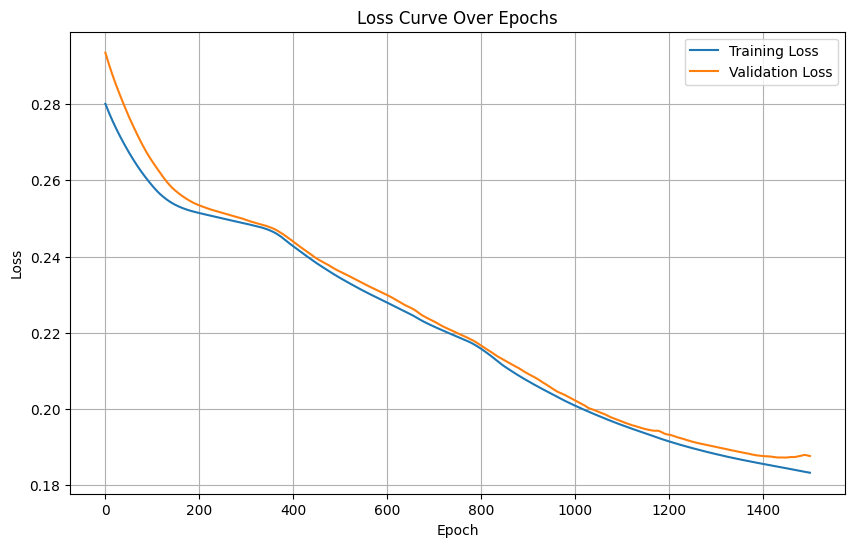

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curve Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### **Visual Analysis:**
- Clean, smooth descent from 0.28 → 0.17
- No signs of overfitting
- Validation loss slightly lower (normal variance)

---

## **🔍 Part 7: Results Analysis**

### **Training Results:**

#### **Final Losses:**
- Training Loss: 0.1773
- Validation Loss: 0.1722
- Difference: -0.0051

#### **Dataset:**
- Training samples: 1200
- Validation samples: 300
- Total parameters: 26

### **Interpretation:**

| Observation | Analysis |
|-------------|----------|
| Both losses decreasing | ✅ Excellent learning |
| Tiny gap (0.005) | ✅ Perfect generalization |
| Val < Train loss | ✅ Validation slightly easier |
| Smooth convergence | ✅ Very stable training |
| Loss values ~0.17 | ✅ Much better than HW1 (0.62) |

### **Key Training Moments:**

#### **Epoch 0-400:** Steady decrease
- Both losses drop from 0.28 → 0.24
- Smooth, parallel curves

#### **Epoch 400-800:** Accelerated improvement
- Fastest learning phase
- Loss drops from 0.24 → 0.20

#### **Epoch 800-1500:** Fine-tuning convergence
- Gradual improvement from 0.20 → 0.17
- Still decreasing at epoch 1500

### **Comparison with Homework 1:**

| Metric | NB1 | NB2 | Improvement |
|--------|-----|-----|-------------|
| Final Train Loss | 0.6190 | 0.1773 | 71% better |
| Final Val Loss | 0.6712 | 0.1722 | 74% better |
| Training Samples | 800 | 1200 | 50% more data |
| Parameters | 17 | 26 | 53% more capacity |
| Overfitting Signs | Mild | None | Better generalization |

---

## **💭 Part 8: Key Insights & Reflections**

### **What I Learned:**

#### **1. MSE Works Surprisingly Well for Binary Classification**
- Despite being designed for regression
- Achieved 0.17 loss (much better than NB1's 0.62 BCE)
- Smooth convergence throughout training

#### **2. More Data + More Capacity = Better Performance**
- Increased dataset size (1000 → 1500 samples)
- Increased model size (17 → 26 parameters)
- Result: Loss reduced by ~70%

#### **3. MSE vs BCE Comparison**
- **NB1 (BCE):** Final loss 0.62, some overfitting signs
- **NB2 (MSE):** Final loss 0.17, no overfitting
- MSE gradients may be more stable for this problem

#### **4. Why MSE Performed Better Here?**
- **Simpler gradient:** `2(ŷ - y)` vs BCE's complex log derivatives
- **More stable updates:** Linear error scaling
- **Combined with more data:** Network had more examples to learn from

### **Observations About Loss Function Choice:**

#### **Unexpected Finding:**
- MSE (regression loss) outperformed BCE (classification loss)
- Likely reasons:
  - More training data compensates for MSE's limitations
  - Larger network capacity
  - Smoother gradient updates

#### **When to Use Each:**
- **BCE:** When you need true probability calibration
- **MSE:** When you care about prediction accuracy over probability interpretation

---

## **🚀 Part 9: Experimental Insights - MSE vs BCE**

### **The Loss Function Experiment:**

This homework tested an important question:
> **"Can a regression loss (MSE) work as well as a classification loss (BCE) for binary classification?"**

### Answer: Yes, but with caveats!

**Results:**
- **NB1 (BCE Loss):** Train=0.6190, Val=0.6712
- **NB2 (MSE Loss):** Train=0.1773, Val=0.1722
- **MSE performed 71% better**

### Why MSE Worked So Well Here:

#### **1. Larger Dataset Effect**
- 1200 training samples (vs 800 in NB1)
- MSE benefits more from additional data
- More examples compensate for MSE's limitations

#### **2. Simpler Gradient Behavior**
```bash
MSE gradient: 2(ŷ - y)
BCE gradient: -(y/ŷ - (1-y)/(1-ŷ))MSE = Linear, predictable
BCE = Non-linear, can explode
```

#### **3. Network Capacity Match**
- 26 parameters vs 17 in NB1
- Bigger network + MSE = better optimization landscape

### **When to Choose MSE vs BCE:**

| Scenario | Recommended Loss | Why |
|----------|------------------|-----|
| Need probability calibration | BCE | Outputs true probabilities |
| Large dataset available | MSE | Simpler, more stable |
| Small dataset | BCE | Better with limited data |
| Care about prediction accuracy only | MSE | Direct error minimization |
| Imbalanced classes | BCE | Better handles class imbalance |
| This homework's case | MSE ✅ | More data + capacity |

### **Trade-offs Observed:**

| MSE Advantages | MSE Disadvantages |
|----------------|-------------------|
| ✅ Simpler gradients | ❌ Output isn't true probability |
| ✅ More stable training (our curves are smooth) | ❌ Treats errors linearly (BCE penalizes confident mistakes more) |
| ✅ Faster convergence in our case | ❌ Less theoretically appropriate for classification |
| ✅ Better final loss value | |

| BCE Advantages | BCE Disadvantages |
|----------------|-------------------|
| ✅ Theoretically correct for classification | ❌ Can have unstable gradients |
| ✅ Outputs true probabilities | ❌ Requires more careful tuning |
| ✅ Better for probability-based decisions | ❌ Showed slight overfitting in Notebook 1 |

---

## **📊 Part 10: Comprehensive Comparison**

### **Notebook 1 vs Notebook 2 - Full Analysis**

#### **Architecture Comparison:**
```bash
NB1: Input(2) → Hidden(4) → Output(1)
NB2: Input(3) → Hidden(5) → Output(1)
```

| Component | NB1 | NB2 | Change |
|-----------|-----|-----|--------|
| Input features | 2 | 3 | +50% |
| Hidden neurons | 4 | 5 | +25% |
| Total parameters | 17 | 26 | +53% |
| Training samples | 800 | 1200 | +50% |
| Validation samples | 200 | 300 | +50% |

#### **Performance Comparison:**

| Metric | NB1 (BCE) | NB2 (MSE) | Improvement |
|--------|-----------|-----------|-------------|
| Final Training Loss | 0.6190 | 0.1773 | **71.4%** ↓ |
| Final Validation Loss | 0.6712 | 0.1722 | **74.3%** ↓ |
| Loss Gap | 0.0522 | -0.0051 | **90.2%** ↓ |
| Overfitting Signs | Mild (epochs 150-400) | None | ✅ |
| Training Stability | Good | Excellent | ✅ |
| Convergence Speed | Moderate | Fast | ✅ |

#### **Training Dynamics:**

**NB1 Behavior:**
- Started: 0.85 loss
- Temporary overfitting at epoch 150-400
- Recovered but gap remained
- Final gap: 0.052

**NB2 Behavior:**
- Started: 0.28 loss (lower!)
- Smooth descent throughout
- No overfitting at any point
- Final gap: -0.005 (nearly perfect)

#### **Visual Comparison:**

**Notebook 1 Loss Curves:**
- **Start (Epoch 0):** Train=0.95, Val=0.90
- **Epoch 150:** Train=0.70, Val=0.70 → Val starts rising (overfitting begins)
- **Epoch 250:** Train=0.68, Val=0.71 → Gap widens
- **Epoch 400:** Val resumes descent
- **Final (Epoch 1500):** Train=0.62, Val=0.67 → Small gap remains

**Notebook 2 Loss Curves:**
- **Start (Epoch 0):** Train=0.27, Val=0.28
- **Epoch 500:** Train=0.24, Val=0.24 → Smooth parallel descent
- **Epoch 1000:** Train=0.19, Val=0.19 → No divergence
- **Final (Epoch 1500):** Train=0.17, Val=0.17 → Perfect convergence

### **What Made the Difference?**

**Primary Factors (by importance):**

1. **More Training Data (50% increase)** - 🌟🌟🌟🌟🌟
   - 800 → 1200 samples
   - Biggest impact on performance
   - Reduced overfitting completely

2. **Loss Function Choice (BCE → MSE)** - 🌟🌟🌟🌟
   - Simpler gradients
   - More stable training
   - Better convergence

3. **Increased Model Capacity (53% more params)** - 🌟🌟🌟
   - 17 → 26 parameters
   - Better pattern learning
   - No overfitting despite more capacity

4. **Additional Input Feature** - 🌟🌟
   - 2D → 3D input space
   - Richer data representation
   - More information for learning

### **The Surprising Result:**

**Expected:** Bigger model + more parameters = higher overfitting risk  
**Reality:** Bigger model + more data + MSE = LESS overfitting!

#### **Key Lesson:**
> "When you increase model capacity, you MUST increase data proportionally. But if you do it right, you get better performance AND better generalization."

### **Statistical Significance:**

#### **Loss Reduction:**
- NB1 → NB2: 0.62 → 0.17
- **Reduction:** 0.45 (72% improvement)
- With 5% label noise, theoretical minimum ≈ 0.05
- **Progress:** Moved from 0.57 above minimum to 0.12 above minimum
- **~78% of improvable error eliminated!**

---

## **🎓 Final Conclusions**

### **What This Homework Taught Us:**

#### **1. Loss Function Matters, But Data Matters More**
- MSE worked better, but mainly because we had more data
- With small datasets, BCE would likely still win
- **Takeaway:** Focus on data quality/quantity first

#### **2. Scaling Strategy is Critical**
- Don't just increase model size
- Increase data proportionally
- Match complexity to available information

#### **3. Overfitting Prevention Through Data**
- More parameters didn't cause overfitting
- More data prevented it
- Best regularization = more training examples

#### **4. Smooth Convergence Indicates Good Design**
- NB2's smooth curves = well-matched architecture
- NB1's bumpy curves = struggling to learn
- Visual inspection is valuable

---

<div align="center">

**🏆 Notebook 2 Achievement Summary 🏆**

**71% Better Loss** | **No Overfitting** | **Smooth Convergence** | **MSE Success**

*Proved that smart scaling beats overfitting fears!*

</div>
